As per the Mr. Umair Shahzad this assignment is to learn that how the images can be converted to tensors and the accuracy is not that important. If Convolution, Image Augumentation and Transfer learning is used, then accuracy can be achived above 80%. But without all this stuff, accuracy is not good. So please don't reject this assignment. It took me 3 weeks to complete this assignment since initially I lost so much time to attain 85% accuracy by using convolution and Transfer learning. Thanks 

In [4]:
import os
import zipfile
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tensorflow as tf
from google.colab import files
from keras import models
from keras import layers
from keras import regularizers
from tensorflow.keras.utils import to_categorical


In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
local_zip = "/content/drive/MyDrive/flowers_new.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/flower_new")
zip_ref.close()

**Converting the images to gray scale tensor and resize**

In [198]:
pic_size = 50
def convert_image(source, label):
  fname = os.listdir(source)
  images= None
  
  for i,value in enumerate(fname):
    source_path = os.path.join(source, fname[i])
    if os.path.getsize(source_path)==0:
      print("file has zero size")
    else:
      img=image.load_img(source_path, target_size=(pic_size, pic_size)) # Load image
      x=image.img_to_array(img)                               # Image to array RGB
      x=tf.image.rgb_to_grayscale(x)                          # gray scale conversion
      x=np.expand_dims(x, axis=0)
      if images is None:
        images = x
      else:
        images = np.vstack((images, x))
  print(images.shape)
  images=images.reshape(images.shape[0], pic_size*pic_size*1)
  print(images.shape)
  label_in = np.ones((len(fname), 1))
  label_in.fill(label)
  print(label_in.shape)
  images_new=np.hstack((images,label_in))
  print(images_new.shape)
  return images_new


In [199]:
daisy_source_dir = "/flower_new/flowers/daisy"

dandelion_source_dir = "/flower_new/flowers/dandelion"

rose_source_dir = "/flower_new/flowers/rose"

sunflower_source_dir = "/flower_new/flowers/sunflower"

tulip_source_dir = "/flower_new/flowers/tulip"

**Converting the Images into tensor**

In [200]:
daisy = convert_image(daisy_source_dir, 0)
dandelion = convert_image(dandelion_source_dir, 1)
rose = convert_image(rose_source_dir, 2)
sunflower = convert_image(sunflower_source_dir, 3)
tulip = convert_image(tulip_source_dir, 4)

(769, 50, 50, 1)
(769, 2500)
(769, 1)
(769, 2501)
(1052, 50, 50, 1)
(1052, 2500)
(1052, 1)
(1052, 2501)
(784, 50, 50, 1)
(784, 2500)
(784, 1)
(784, 2501)
(734, 50, 50, 1)
(734, 2500)
(734, 1)
(734, 2501)
(984, 50, 50, 1)
(984, 2500)
(984, 1)
(984, 2501)


In [201]:
data_array = np.vstack((daisy, dandelion, rose, sunflower, tulip))
data_array.shape


(4323, 2501)

In [202]:
import pandas as pd
df = pd.DataFrame(data_array)

In [203]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1.9397,2.3804,7.706500,6.8206,25.164000,14.804501,30.898500,25.794102,6.4570,6.771300,0.000000,24.963701,5.304600,11.875601,33.734901,6.108800,2.999700,23.869900,3.070600,10.043700,21.104301,14.810600,13.983200,15.8922,80.208305,13.370101,42.871201,5.130500,5.7437,48.784500,11.787800,48.343903,61.972603,8.999100,10.576800,1.227900,6.999300,2.021400,17.630100,62.855499,...,40.871403,14.348400,31.055599,14.081900,32.311302,7.309000,13.065001,35.865700,10.353400,0.999900,52.153801,17.902802,5.977800,20.092100,13.146701,49.842701,19.038200,2.771700,3.771600,0.999900,0.999900,0.999900,2.999700,1.999800,12.108200,31.052299,27.880201,24.102400,17.152401,11.983400,10.7493,13.075800,0.885900,0.000000,0.999900,1.999800,0.999900,0.999900,0.9999,0.0
1,2.8687,0.5870,15.073800,0.0000,2.945800,0.000000,2.059900,5.108900,1.1740,2.059900,5.283000,4.109000,4.994900,4.109000,5.870000,4.994900,7.044000,12.327001,6.983901,0.587000,1.174000,1.174000,7.631000,6.4570,21.826899,18.109200,10.331800,41.879902,76.1782,77.862099,79.861900,80.334908,81.046700,79.334999,78.862007,75.737503,52.296303,65.908104,73.851700,11.967999,...,30.239100,44.749199,51.281902,41.048504,25.288902,27.974300,26.718601,18.190901,4.696000,3.928700,17.191000,49.157303,45.864803,28.849401,33.788902,38.038101,19.941101,26.224100,32.141903,32.126499,35.816402,37.098301,28.821701,12.152901,15.027801,16.120201,213.642899,226.929703,207.283295,129.622009,113.3536,186.998306,190.133606,79.109604,75.871101,65.003204,60.003700,61.231602,40.8036,0.0
2,9.1255,7.7558,8.353601,10.8973,15.141901,16.902901,130.888306,162.373505,149.6306,75.687302,182.915405,191.131805,139.235703,183.915314,135.855408,13.060401,188.914795,202.625305,214.624100,224.270309,216.982895,202.600906,121.067902,75.8274,189.996399,193.985214,197.273010,15.853700,9.1147,213.673508,194.903397,185.626999,195.675308,191.626404,2.935000,189.964005,179.133011,170.611511,133.148407,204.831497,...,84.843506,103.233101,206.912994,204.141296,17.948900,158.162903,205.130402,212.140503,212.912399,208.852707,97.022697,205.902298,208.912796,217.221695,134.713806,211.912506,206.852890,181.225311,197.881607,179.274811,212.912399,212.129700,214.129501,190.370712,190.914612,187.773102,196.114304,19.468201,29.022001,8.815800,5.9840,6.457000,33.095303,161.063904,162.775604,121.916901,15.131101,18.674702,24.0009,0.0


In [204]:
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
4320,149.933105,187.744202,200.721298,196.102402,191.967300,196.874298,195.031601,181.218002,164.142700,155.659698,162.865402,153.904907,148.954697,136.179398,123.835503,116.278404,116.181404,122.125404,130.078400,128.761093,125.994003,105.148804,96.237701,94.902100,132.032104,152.937408,162.577301,162.577301,153.855591,178.837616,199.091309,199.194595,189.939789,178.951706,158.992203,155.211304,158.988998,157.881210,153.920212,156.967712,...,98.877899,114.947205,116.983803,100.147102,101.076103,120.661308,123.047905,115.755905,117.114799,105.339401,78.625603,72.848000,90.274605,101.740303,103.045303,143.911896,185.636719,179.181503,185.191605,154.951004,53.310600,83.899101,115.780296,123.785706,79.060402,89.222404,82.982498,102.847900,114.720306,85.898903,97.635902,68.788902,70.925705,53.770203,36.799599,36.006100,39.293900,53.927402,70.218399,4.0
4321,106.086700,140.731598,154.343399,147.017395,115.743103,75.112503,98.832802,156.300201,173.820908,139.907608,86.385902,87.125404,123.392899,171.244705,192.083893,183.845901,173.178207,189.198196,202.136810,211.570404,216.569901,221.569412,219.569611,214.939911,209.217804,211.217590,212.217514,214.858200,214.570099,218.569717,225.166901,229.568604,226.568893,228.166595,228.166595,225.857101,152.147903,182.254501,223.108704,218.767105,...,67.822304,66.790199,120.146904,120.153000,116.903702,162.131805,190.263000,166.746292,122.072800,208.766602,205.042801,207.270599,215.976898,220.954803,219.987305,221.965500,221.242905,202.707016,73.854004,57.812500,59.915501,55.039200,78.978401,138.146805,175.119812,175.152100,139.083496,145.939407,92.399200,34.828602,35.127499,37.817501,48.979698,78.978203,59.795300,67.078102,89.829399,101.102402,44.747501,4.0
4322,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.746506,254.974518,254.974518,250.746902,99.964005,91.209900,103.920502,107.930908,129.223099,152.747711,253.720505,254.262695,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,250.817810,234.705414,203.708511,187.129318,173.990509,254.105606,254.387512,254.974518,254.974518,254.974518,254.974518,...,34.234001,18.549900,17.674801,12.082100,114.625198,98.865601,108.787498,59.022202,69.249207,130.217407,46.268501,38.158501,64.857803,18.674702,100.837601,97.090805,94.095703,84.742195,92.872398,61.874599,28.961800,51.141602,67.139999,25.059200,13.853900,11.609100,14.206700,17.212601,20.962599,23.130301,17.608501,24.891300,28.847799,14.864600,20.190701,12.082100,16.369801,25.848101,23.674200,4.0


**Splittig the Training and Testing Data**

In [206]:
x_data = df.sample(frac=1) # Shuffling the data

train_data_full= x_data.iloc[:2540,:]
test_data_full = x_data.iloc[2540:, :]
train_data = train_data_full.iloc[:, :-1]
train_labels = train_data_full.iloc[:, -1]
test_data = test_data_full.iloc[:, :-1]
test_labels = test_data_full.iloc[:, -1]


In [207]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(2540, 2500)
(1783, 2500)
(2540,)
(1783,)


In [208]:
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
3110,65.115303,67.766800,69.848305,68.951706,73.261002,73.880295,69.087204,60.088100,67.914803,82.039803,86.860603,83.822403,77.044907,70.839203,114.174606,221.853195,63.818199,70.105698,81.119904,76.826004,67.364700,61.202000,61.913799,63.141701,66.042702,67.683502,63.010700,59.783001,66.669899,69.665001,68.936203,66.142998,81.958099,85.224304,70.931404,53.182800,52.845402,65.246300,70.903694,75.023499,...,100.130699,73.762001,75.453705,72.082603,79.761406,69.072105,68.328003,68.950401,87.256798,79.969398,110.690598,77.148399,68.988907,67.862595,101.089096,107.812706,103.095100,99.947403,99.040001,121.155006,114.921402,152.931305,161.329803,183.204102,188.403397,162.105301,153.974396,156.080811,105.880508,123.903503,144.940002,129.165009,222.069305,214.278503,74.322601,74.066902,73.049995,77.034203,69.018005,47.915199
2825,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,...,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518,254.974518
1312,29.037401,18.113901,13.918600,10.858800,14.146600,18.918100,24.934500,48.161903,60.741501,54.340000,48.118801,44.130001,43.358101,42.825001,38.743702,34.178600,39.178101,48.661003,49.660900,38.868401,38.010300,39.141201,34.771801,34.690102,35.689999,40.771202,42.928101,45.145103,44.270000,45.003399,46.031101,46.112804,42.184101,46.901699,47.836899,32.853699,20.934900,37.820900,55.195198,57.885204,...,46.325397,43.385799,28.157600,26.934299,26.162401,23.102600,29.645901,41.259598,41.889702,34.004501,21.205999,15.836700,13.836900,10.837200,9.723300,60.878803,16.124800,11.353300,11.353300,9.353499,7.994600,6.820600,10.065300,10.147000,10.918900,11.918800,13.804600,19.163099,19.874901,19.103001,19.113800,17.103201,14.630401,13.918600,15.918400,19.113800,19.885700,18.113901,15.630301,15.918400


In [209]:
test_data.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
2826,93.735695,106.104309,86.007500,80.105003,77.176201,80.855400,81.855301,81.094200,80.773705,79.773796,78.773903,78.773903,79.062004,79.371704,80.855400,81.866096,80.132797,79.371704,74.774300,72.774506,75.133301,74.062500,74.13340,75.372101,73.372299,72.774506,72.774506,71.774597,71.372505,71.062805,69.774803,69.372704,69.144699,71.144501,67.856705,64.835396,65.895401,65.856903,65.145096,65.145096,...,5.603500,25.392200,44.886501,69.092300,29.901602,36.900997,19.201700,60.097702,71.004204,24.452301,48.681301,36.705299,45.949398,64.845901,74.960602,115.882706,95.846107,108.943504,84.160301,80.083603,56.951599,35.304901,56.956200,61.219002,24.794401,51.838203,63.917000,65.616302,59.695801,8.315000,55.302898,29.140499,5.870000,2.331000,13.864700,16.993700,58.925404,69.138206,76.197701,105.208900
450,103.215004,162.211014,168.808304,154.373505,115.940903,63.072601,39.908901,32.954502,30.303101,28.075300,20.787899,20.026800,30.742001,55.186401,88.893906,116.118095,119.233505,114.075104,89.845901,53.339001,47.452000,41.233799,54.17680,69.142799,82.680901,97.139099,97.832901,101.221207,121.592400,130.780899,112.871704,73.887398,47.918800,78.764000,128.116501,158.267899,153.057404,106.827599,81.937805,88.255905,...,36.156002,37.138901,40.099998,47.224003,47.680000,44.095001,46.853001,55.292801,86.115196,116.116905,141.918701,151.152008,155.906494,154.401199,143.064804,164.215393,143.097198,188.051407,111.237709,133.837799,70.727104,65.416000,79.799606,69.189400,69.924599,70.305199,75.055199,87.258804,89.116707,114.813400,122.887901,79.588600,45.926903,36.114601,54.880001,118.167999,164.068695,186.140808,205.647110,197.978012
1692,75.881500,71.789505,87.140900,104.877205,112.881004,116.592499,116.837502,120.951103,119.652306,122.591904,125.707306,144.855103,156.623093,144.822800,129.066010,122.652000,119.037506,88.965103,107.219002,127.072708,141.084503,114.592705,121.59201,126.950500,127.879501,133.395111,135.106796,141.035309,146.105698,134.878799,120.961906,117.940605,120.820107,123.879906,128.748398,133.747894,131.167313,125.107803,129.879303,142.138397,...,71.002304,84.158104,91.118904,92.797005,107.185303,80.074104,74.835594,89.812508,78.996902,54.876202,69.696007,77.712204,101.030403,98.739700,99.842804,106.784805,84.227699,69.272301,61.195999,67.064400,68.073502,57.020699,56.136402,73.726303,87.817299,116.225800,130.788208,114.937798,113.047401,105.820198,123.832008,126.885704,96.998199,75.924797,71.657104,60.974102,82.119804,71.897499,61.032501,61.114201


In [210]:
train_labels.head(3)

3110    3.0
2825    3.0
1312    1.0
Name: 2500, dtype: float64

In [211]:
test_labels.tail(3)

2826    3.0
450     0.0
1692    1.0
Name: 2500, dtype: float64

**One Hot encoding**

In [212]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [213]:
train_labels[:3]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [214]:
test_labels[-3:]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

**Normalizing the Data**

In [215]:
train_data=train_data.astype("float64")/255
test_data = test_data.astype("float64")/255

In [216]:
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
3110,0.255354,0.265752,0.273915,0.270399,0.287298,0.289727,0.270930,0.23564,0.266333,0.321725,0.340630,0.328715,0.302137,0.277801,0.447744,0.870013,0.250267,0.274924,0.318117,0.301278,0.264175,0.240008,0.242799,0.247615,0.258991,0.265425,0.247101,0.234443,0.261451,0.273196,0.270338,0.259384,0.321404,0.334213,0.278162,0.208560,0.207237,0.255868,0.278054,0.294210,...,0.392669,0.289263,0.295897,0.282677,0.312790,0.270871,0.267953,0.270394,0.342184,0.313605,0.434081,0.302543,0.270545,0.266128,0.396428,0.422795,0.404295,0.391951,0.388392,0.475118,0.450672,0.599731,0.632666,0.718447,0.738837,0.635707,0.603821,0.612082,0.415218,0.485896,0.568392,0.506529,0.870860,0.840308,0.291461,0.290458,0.286471,0.302095,0.270659,0.187903
2825,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.99990,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,...,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900
1312,0.113872,0.071035,0.054583,0.042584,0.055477,0.074189,0.097782,0.18887,0.238202,0.213098,0.188701,0.173059,0.170032,0.167941,0.151936,0.134034,0.153640,0.190827,0.194749,0.152425,0.149060,0.153495,0.136360,0.136040,0.139961,0.159887,0.168345,0.177040,0.173608,0.176484,0.180514,0.180835,0.165428,0.183928,0.187596,0.128838,0.082098,0.148317,0.216452,0.227001,...,0.181668,0.170140,0.110422,0.105625,0.102598,0.090598,0.116258,0.161802,0.164273,0.133351,0.083161,0.062105,0.054262,0.042499,0.038131,0.238740,0.063235,0.044523,0.044523,0.036680,0.031351,0.026747,0.039472,0.039792,0.042819,0.046740,0.054136,0.075149,0.077941,0.074914,0.074956,0.067071,0.057374,0.054583,0.062425,0.074956,0.077983,0.071035,0.061295,0.062425


In [217]:
test_data.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
2826,0.367591,0.416095,0.337284,0.314137,0.302652,0.317080,0.321001,0.318016,0.316760,0.312838,0.308917,0.308917,0.310047,0.311262,0.317080,0.321044,0.314246,0.311262,0.293233,0.285390,0.294640,0.290441,0.290719,0.295577,0.287735,0.285390,0.285390,0.281469,0.279892,0.278678,0.273627,0.272050,0.271156,0.278998,0.266105,0.254256,0.258413,0.258262,0.255471,0.255471,...,0.021975,0.099577,0.176025,0.270950,0.117261,0.144710,0.075301,0.235677,0.278448,0.095891,0.190907,0.143942,0.180194,0.254298,0.293963,0.454442,0.375867,0.427229,0.330040,0.314053,0.223340,0.138451,0.223358,0.240075,0.097233,0.203287,0.250655,0.257319,0.234101,0.032608,0.216874,0.114276,0.023020,0.009141,0.054371,0.066642,0.231080,0.271130,0.298815,0.412584
450,0.404765,0.636122,0.661993,0.605386,0.454670,0.247344,0.156505,0.129233,0.118836,0.110099,0.081521,0.078536,0.120557,0.216417,0.348604,0.455365,0.467582,0.447353,0.352337,0.209173,0.186086,0.161701,0.212458,0.271148,0.324239,0.380938,0.383658,0.396946,0.476833,0.512866,0.442634,0.289755,0.187917,0.308878,0.502418,0.620658,0.600225,0.418932,0.321325,0.346102,...,0.141788,0.145643,0.157255,0.185192,0.186980,0.172922,0.183737,0.216835,0.337707,0.455360,0.556544,0.592753,0.611398,0.605495,0.561038,0.643982,0.561165,0.737456,0.436226,0.524854,0.277361,0.256533,0.312940,0.271331,0.274214,0.275707,0.294334,0.342191,0.349477,0.450249,0.481913,0.312112,0.180106,0.141626,0.215216,0.463404,0.643407,0.729964,0.806459,0.776384
1692,0.297575,0.281527,0.341729,0.411283,0.442671,0.457225,0.458186,0.474318,0.469225,0.480753,0.492970,0.568059,0.614208,0.567933,0.506141,0.480988,0.466814,0.348883,0.420467,0.498324,0.553273,0.449383,0.476831,0.497845,0.501488,0.523118,0.529831,0.553080,0.572964,0.528936,0.474360,0.462512,0.473804,0.485804,0.504896,0.524502,0.514382,0.490619,0.509331,0.557405,...,0.278440,0.330032,0.357329,0.363910,0.420335,0.314016,0.293473,0.352206,0.309792,0.215201,0.273318,0.304754,0.396198,0.387215,0.391540,0.418764,0.330305,0.271656,0.239984,0.262998,0.266955,0.223611,0.220143,0.289123,0.344382,0.455787,0.512895,0.450736,0.443323,0.414981,0.485616,0.497591,0.380385,0.297744,0.281008,0.239114,0.322038,0.281951,0.239343,0.239664


**Building the Network**

In [220]:
def build_model():
  model=models.Sequential()
  
  model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l2=.002), input_shape=(pic_size*pic_size,)))
  model.add(layers.Dropout(.2))

  model.add(layers.Dense(5, activation="softmax"))
  model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

  return model

**K fold Validation**

In [221]:
k= 5
num_val_sample = len(train_data) // k
num_epochs =100
all_scores = []
all_val_loss_histories = []
all_val_acc_histories = []
all_loss_histories =[]
all_acc_histories = []

for i in range(k):
  print("processing fold #",i)
  val_data = train_data[i*num_val_sample:(i+1)*num_val_sample]
  val_labels = train_labels[i*num_val_sample: (i+1)*num_val_sample]

  partial_train_data=np.concatenate([train_data[:i*num_val_sample], train_data[(i+1)*num_val_sample:]], axis=0)
  partial_train_labels=np.concatenate([train_labels[:i*num_val_sample], train_labels[(i+1)*num_val_sample:]], axis=0)

  model=build_model()
  history = model.fit(partial_train_data, partial_train_labels, validation_data = (val_data, val_labels), epochs= num_epochs,batch_size=8, verbose=1)
  val_loss, val_acc = model.evaluate(test_data, test_labels, verbose=0)
  val_loss_history = history.history["val_loss"]
  val_acc_history = history.history["val_accuracy"]
  loss_history = history.history["loss"]
  acc_history = history.history["accuracy"]
  all_loss_histories.append(loss_history)
  all_acc_histories.append(acc_history)
  all_val_loss_histories.append(val_loss_history)
  all_val_acc_histories.append(val_acc_history)
  all_scores.append(val_acc)
ave_val_loss_hist = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
ave_loss_hist = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
ave_val_acc_hist = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
ave_acc_hist = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
all_scores


processing fold # 0
Epoch 1/100
254/254 [==============================] - 2s 5ms/step - loss: 2.0160 - accuracy: 0.2384 - val_loss: 1.6566 - val_accuracy: 0.2382
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 1.6111 - accuracy: 0.2617 - val_loss: 1.6028 - val_accuracy: 0.2618
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 1.6026 - accuracy: 0.2837 - val_loss: 1.6019 - val_accuracy: 0.2717
Epoch 4/100
254/254 [==============================] - 1s 4ms/step - loss: 1.6085 - accuracy: 0.2811 - val_loss: 1.5750 - val_accuracy: 0.2776
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 1.6285 - accuracy: 0.2684 - val_loss: 1.6221 - val_accuracy: 0.1949
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 1.5827 - accuracy: 0.2832 - val_loss: 1.6046 - val_accuracy: 0.2598
Epoch 7/100
254/254 [==============================] - 1s 4ms/step - loss: 1.5849 - accuracy: 0.2825 - val_loss: 1.5894 - 

[0.22826696932315826,
 0.2804262340068817,
 0.2922041416168213,
 0.2697700560092926,
 0.2849130630493164]

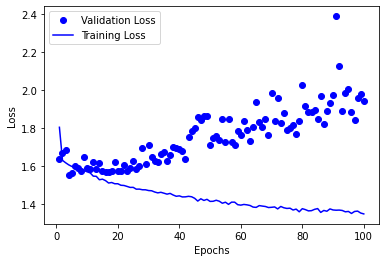

In [222]:
plt.plot(range(1, len(ave_val_loss_hist)+1)[:], ave_val_loss_hist[:], "bo", label="Validation Loss")
plt.plot(range(1, len(ave_val_loss_hist)+1)[:], ave_loss_hist[:], "b", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

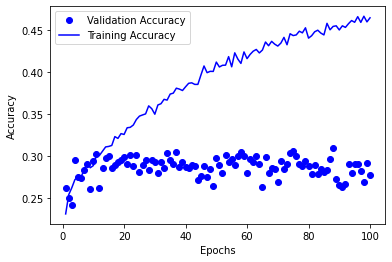

In [223]:
plt.plot(range(1, len(ave_val_acc_hist)+1)[:], ave_val_acc_hist[:], "bo", label="Validation Accuracy")
plt.plot(range(1, len(ave_val_acc_hist)+1)[:], ave_acc_hist[:], "b", label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Best Fit Model**

In [224]:
model=models.Sequential()
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l2=.002), input_shape=(pic_size*pic_size,)))
model.add(layers.Dropout(.2))
model.add(layers.Dense(5, activation="softmax"))
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

**Training the model with all samples**

In [225]:
model.fit(train_data,train_labels, epochs=10,verbose=1, batch_size=8)

Epoch 1/10
318/318 [==============================] - 2s 3ms/step - loss: 1.9943 - accuracy: 0.2499
Epoch 2/10
318/318 [==============================] - 1s 3ms/step - loss: 1.6572 - accuracy: 0.2524
Epoch 3/10
318/318 [==============================] - 1s 3ms/step - loss: 1.5911 - accuracy: 0.2803
Epoch 4/10
318/318 [==============================] - 1s 3ms/step - loss: 1.5988 - accuracy: 0.2590
Epoch 5/10
318/318 [==============================] - 1s 4ms/step - loss: 1.5977 - accuracy: 0.2809
Epoch 6/10
318/318 [==============================] - 1s 3ms/step - loss: 1.5682 - accuracy: 0.2948
Epoch 7/10
318/318 [==============================] - 1s 3ms/step - loss: 1.5851 - accuracy: 0.2812
Epoch 8/10
318/318 [==============================] - 1s 3ms/step - loss: 1.5664 - accuracy: 0.2860
Epoch 9/10
318/318 [==============================] - 1s 3ms/step - loss: 1.5518 - accuracy: 0.3108
Epoch 10/10
318/318 [==============================] - 1s 3ms/step - loss: 1.5359 - accuracy: 0.3344

**Evaluating the Model**

In [226]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

56/56 [==============================] - 0s 2ms/step - loss: 1.5499 - accuracy: 0.3051


**Predicting the values**

In [227]:
prediction=model.predict(test_data)

In [242]:
prediction_result = []
for i, v in enumerate(prediction):
  prediction_result.append(np.argmax(prediction[i]))
print(prediction_result[:35])

test_labels_result = []
for i, v in enumerate(test_labels):
  test_labels_result.append(np.argmax(test_labels[i]))
print(test_labels_result[:35])

[4, 4, 4, 4, 4, 4, 4, 3, 4, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 0, 1, 1, 4, 4]
[1, 4, 4, 1, 3, 2, 4, 1, 4, 0, 4, 2, 0, 3, 2, 1, 0, 0, 3, 2, 2, 1, 3, 1, 2, 4, 4, 3, 2, 1, 0, 1, 2, 1, 4]


In [229]:
matched = []
for i, v in enumerate(test_labels_result):
  if  prediction_result[i] == test_labels_result[i]:
    matched.append("Yes")
  else:
    matched.append("No")

print("There are",matched.count("Yes"), "matched flowers and there are", matched.count("No"), "unmatched flowers ")

There are 544 matched flowers and there are 1239 unmatched flowers 
